Instacart is an American company that operates as a same-day grocery delivery service. Customers select groceries through a web application from various retailers and delivered by a personal shopper. Instacart's service is mainly provided through a smartphone app, available on iOS and Android platforms, apart from its website.

In 2017 Instacart organised a Kaggle competition and provided to the community a sample dataset of over 3 million grocery orders from more than 200,000 Instacart users. The orders include 32 million basket items and 50,000 unique products. The objective of the competition was participants to predict which previously purchased products will be in a user’s next order.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
DATASET_DIRECTORY = "/Users/lokeshdogga/Downloads/BigData_InstaCart_DataSet"


aisles = pd.read_csv(f'{DATASET_DIRECTORY}/aisles.csv')

departments = pd.read_csv(f'{DATASET_DIRECTORY}/departments.csv')

order_products_prior = pd.read_csv(f'{DATASET_DIRECTORY}/order_products__prior.csv')

order_products_train = pd.read_csv(f'{DATASET_DIRECTORY}/order_products__train.csv')

orders = pd.read_csv(f'{DATASET_DIRECTORY}/orders.csv')

products = pd.read_csv(f'{DATASET_DIRECTORY}/products.csv')

orders: This table includes all orders, namely prior, train, and test. It has single primary key (order_id).

order_products_train: This table includes training orders. It has a composite primary key (order_id and product_id) and indicates whether a product in an order is a reorder or not (through the reordered variable).

order_products_prior : This table includes prior orders. It has a composite primary key (order_id and product_id) and indicates whether a product in an order is a reorder or not (through the reordered variable).

products: This table includes all products. It has a single primary key (product_id)

aisles: This table includes all aisles. It has a single primary key (aisle_id)

departments: This table includes all departments. It has a single primary key (department_id)

In [3]:
products = pd.merge(aisles, products, on='aisle_id')
products = pd.merge(departments, products, on='department_id')
products = pd.merge(order_products_train, products, on='product_id')
products_and_orders = pd.merge(products, orders, on='order_id')

In [4]:
temp = products_and_orders.groupby('order_id')['product_id'].apply(list)
len(temp)

131209

In [5]:
print(temp.head(10).to_string())

order_id
1      [49302, 11109, 10246, 49683, 43633, 13176, 472...
36     [39612, 19660, 49235, 43086, 46620, 34497, 486...
38     [11913, 18159, 4461, 21616, 23622, 32433, 2884...
96     [20574, 30391, 40706, 25610, 27966, 24489, 39275]
98     [13176, 27966, 8859, 19731, 43654, 4357, 37664...
112    [47209, 27104, 21174, 41860, 38273, 5876, 2921...
170    [13176, 18394, 37766, 6236, 5077, 8153, 43772,...
218                    [1194, 5578, 38159, 10305, 38557]
226    [39275, 28199, 24852, 29883, 28427, 7754, 3994...
349    [33000, 11361, 27695, 47672, 45633, 38015, 369...


In [6]:
from collections import defaultdict

# Initialize a nested dictionary to hold co-occurrence counts
co_occurrence_counts = defaultdict(lambda: defaultdict(int))

# Populate the co-occurrence counts
for order in temp:
    for i in range(len(order)):
        for j in range(i + 1, len(order)):
            co_occurrence_counts[order[i]][order[j]] += 1
            co_occurrence_counts[order[j]][order[i]] += 1  # Symmetric

# Convert the nested dictionary to a DataFrame for easier analysis
# Note: This step can still be memory-intensive depending on the number of unique products
co_occurrence_df = pd.DataFrame(co_occurrence_counts).fillna(0)

# The DataFrame co_occurrence_df now holds the co-occurrence counts between products


In [7]:
co_occurrence_df.head(10)

,49302,11109,10246,49683,43633,13176,47209,22035,39612,19660,...,25603,8360,40636,27645,25275,1528,47935,9491,16380,38900
11109,1.0,0.0,7.0,4.0,1.0,41.0,23.0,11.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10246,1.0,7.0,0.0,46.0,1.0,234.0,128.0,36.0,0.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49683,1.0,4.0,46.0,0.0,2.0,225.0,183.0,51.0,0.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43633,1.0,1.0,1.0,2.0,0.0,4.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13176,4.0,41.0,234.0,225.0,4.0,0.0,2420.0,587.0,2.0,427.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47209,2.0,23.0,128.0,183.0,2.0,2420.0,0.0,286.0,3.0,171.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22035,2.0,11.0,36.0,51.0,2.0,587.0,286.0,0.0,1.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20574,1.0,0.0,7.0,15.0,0.0,55.0,27.0,21.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41220,1.0,4.0,30.0,48.0,0.0,250.0,177.0,39.0,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34969,1.0,2.0,34.0,171.0,0.0,313.0,215.0,47.0,0.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
len(co_occurrence_df)

39061

In [9]:
temp = co_occurrence_df.head(10)
summary_df = []
for product_id, row in co_occurrence_df.iterrows():
    
    max_product = row.drop(product_id).idxmax()
    max_value = row[max_product]

    # Append to the summary DataFrame
    summary_df.append({'For': product_id, 'To': max_product, 'Values': max_value})
summary_df = pd.DataFrame(summary_df)
print(summary_df.to_string())

         For     To  Values
0      11109  13176    41.0
1      10246  13176   234.0
2      49683  24852   743.0
3      43633  21903     6.0
4      13176  21137  3074.0
5      47209  13176  2420.0
6      22035  13176   587.0
7      20574  24852    91.0
8      41220  13176   250.0
9      34969  24852   594.0
10      7503  24852   116.0
11     19446  24852    44.0
12     44142  24852   360.0
13     36772  24852    78.0
14     26604  24852   690.0
15     17948  13176   340.0
16      1158  24852   256.0
17     38200  24852    78.0
18     14267  13176    54.0
19     20118  24852    19.0
20     35176  13176    41.0
21     16797  24852  1948.0
22     47626  24852  2158.0
23     21903  13176  2236.0
24      5450  24852   865.0
25      2295  15290   396.0
26     40377  13176    75.0
27      3849  13176    67.0
28     15675  13176     6.0
29     46730  13176     2.0
30     48679  13176   632.0
31     46979  24852   793.0
32     21616  24852   594.0
33     30391  13176  1268.0
34     27344  24852 

In [44]:
# temp = co_occurrence_df.head(10)
# final_df = []
# for product_id, row in temp.iterrows():
#     max_product = row.drop(product_id).idxmax()
#     max_value = row[max_product]
#     proportional_values = (max_value / row.sum())*100

#     source_name = products.get('product_name').loc[products.get('product_id') == product_id].values[0]
#     destination_name = products.get('product_name').loc[products.get('product_id') == max_product].values[0]
    
#     # Append to the summary DataFrame
#     final_df.append({'For': source_name, 'To': destination_name, 'Correlation': max_value, 'proportion': proportional_values})
# final_df = pd.DataFrame(final_df)
# print(final_df.head(10).to_string())

temp = co_occurrence_df.head(10)
final_data = []

for product_id, row in temp.iterrows():
    # Drop the product_id to avoid self-comparison and get the top 10
    top_k_products = row.drop(product_id).nlargest(5)
    
    # Create a dictionary to store the data
    source_name = products.get('product_name').loc[products.get('product_id') == product_id].values[0]
    destination_name = [products.get('product_name').loc[products.get('product_id') == max_product].values[0] for max_product in top_k_products.index.tolist()]
    data = {
        'product_id': source_name,
        'top_k_related_product_ids': destination_name,
        'top_k_co_occurrence_values': top_k_products.values.tolist(),
        'top_k_proportional_values': [(value / row.sum()) * 100 for value in top_k_products.values]
    }
    
    # Append the dictionary to the final_data list
    final_data.append(data)

# Convert the list of dictionaries to a DataFrame
final_df = pd.DataFrame(final_data)
print(final_df.to_string())


                                      product_id                                                                                  top_k_related_product_ids                top_k_co_occurrence_values                                                                             top_k_proportional_values
0  Organic 4% Milk Fat Whole Milk Cottage Cheese           [Bag of Organic Bananas, Banana, Organic Hass Avocado, Organic Strawberries, Organic Whole Milk]            [41.0, 25.0, 23.0, 23.0, 20.0]     [1.7911751856705984, 1.09217999126256, 1.0048055919615553, 1.0048055919615553, 0.873743993010048]
1                          Organic Celery Hearts             [Bag of Organic Bananas, Organic Baby Spinach, Banana, Organic Strawberries, Organic Cucumber]       [234.0, 225.0, 174.0, 170.0, 147.0]   [1.3001444604956107, 1.2501389043227027, 0.9667740860095567, 0.944549394377153, 0.8167574174908323]
2                                 Cucumber Kirby                                        [Banana, Lar

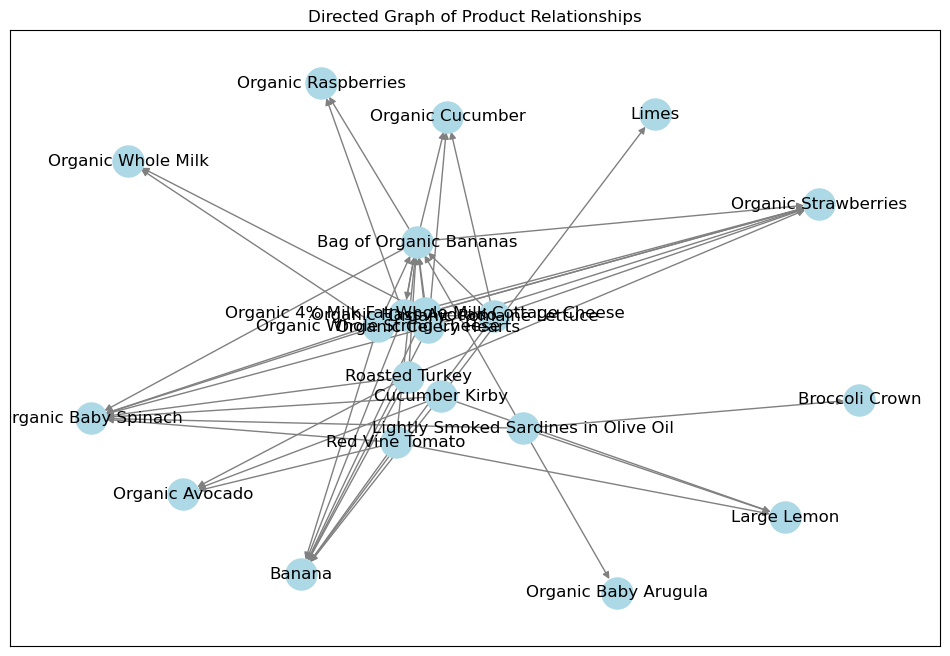

In [45]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming final_df is your DataFrame with the products and their top K related products
G = nx.DiGraph()

# Add edges to the graph
for idx, row in final_df.iterrows():
    product_id = row['product_id']
    related_product_ids = row['top_k_related_product_ids']
    for related_product_id in related_product_ids:
        G.add_edge(product_id, related_product_id)

# Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # This helps with the positioning of the nodes
nx.draw_networkx(G, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray', arrows=True)
plt.title('Directed Graph of Product Relationships')
plt.show()
